# Multi Glyphs Bokeh

In [1]:
from bokeh.plotting import figure,output_file,show

In [2]:
# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

output_file("log_lines.html")

In [3]:
# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

In [4]:
# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")


GlyphRenderer(id='1113', ...)

In [5]:
show(p) # this one???

# Sub Plots Matplotlib

## Working with Multiple Figure Windows And subplots

In [22]:
### Example 1

In [23]:
import matplotlib.pyplot as plt
import numpy as np

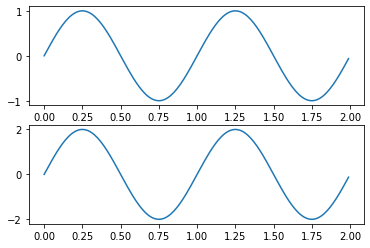

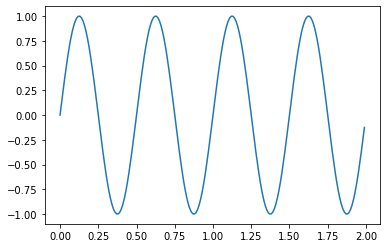

In [24]:
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)
plt.figure(2)
plt.plot(t, s2)

plt.show()

In [8]:
### Example 2 (Not supposed to work?????)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


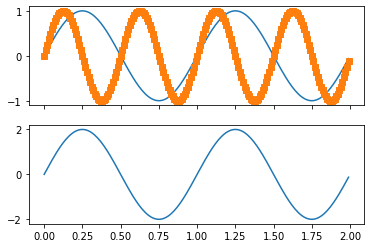

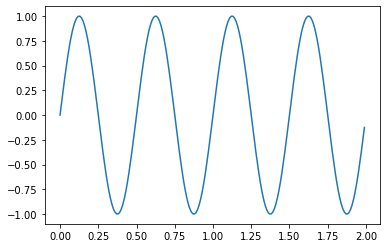

In [10]:
#numpy arange is array creation routine
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)
plt.figure(2)
plt.plot(t, s2)
plt.figure(1)
plt.subplot(211)
plt.plot(t, s2, 's')
ax = plt.gca()
ax.set_xticklabels([])
plt.show()
#oh yea??? what about the error. what do i put? yea i put it in exactly. show me in the chat


In [8]:
### Example 3 NaN plot

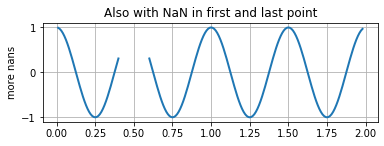

In [9]:
import numpy as np
import matplotlib.pyplot as plt

s = np.cos(2 * 2*np.pi * t)
t[41:60] = np.nan

plt.plot(t, s, '-', lw=2)

plt.ylabel('voltage (mV)')
plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
plt.grid(True)
plt.subplot(2, 1, 2)
t[0] = np.nan
t[-1] = np.nan
plt.plot(t, s, '-', lw=2)
plt.title('Also with NaN in first and last point')

plt.ylabel('more nans')
plt.grid(True)

plt.show()

In [10]:
### Example 4 Psd (signal processing)

<function matplotlib.pyplot.show(*args, **kw)>

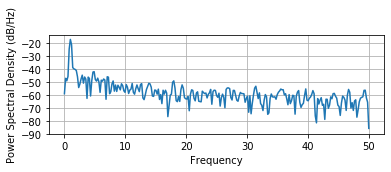

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show


In [15]:
### Example 4

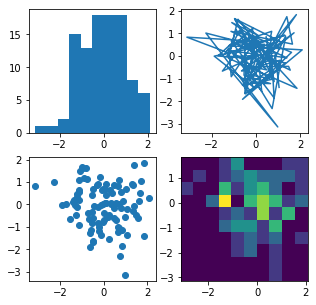

In [17]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show() # it didnt work for u? oh ok!

In [ ]:
# I couldnt get the last one. tried to copy paste and it came out bad lol. LOLOL

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

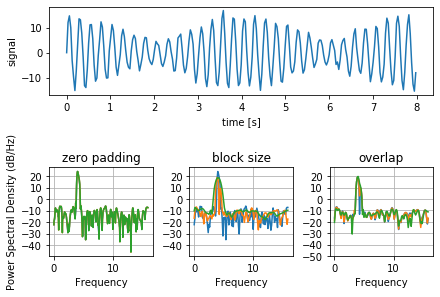

In [12]:
dt = np.pi / 100.
fs = 1. / dt
t = np.arange(0, 8, dt)
y = 10. * np.sin(2 * np.pi * 4 * t) + 5. * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)

# Plot the raw time series
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(t, y)
ax.set_xlabel('time [s]')
ax.set_ylabel('signal')

# Plot the PSD with different amounts of zero padding. This uses the entire
# time series at once
ax2 = fig.add_subplot(gs[1, 0])
ax2.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)
plt.title('zero padding')

# Plot the PSD with different block sizes, Zero pad to the length of the
# original data sequence.
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
ax3.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
ax3.set_ylabel('')
plt.title('block size')

# Plot the PSD with different amounts of overlap between blocks
ax4 = fig.add_subplot(gs[1, 2], sharex=ax2, sharey=ax2)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t),
        noverlap=int(0.05 * len(t) / 2.), Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t),
        noverlap=int(0.2 * len(t) / 2.), Fs=fs)
ax4.set_ylabel('')
plt.title('overlap')

plt.show()

In [2]:
print(format(0.2,".0%"))

20%


In [3]:
print('I\'m ready to begin')

I'm ready to begin


In [4]:
print('The path is D:\\sample\\test.')

The path is D:\sample\test.
